# 📊 Correlação entre Variáveis e Incidência de Diabetes

Este relatório apresenta a correlação entre as principais variáveis clínicas e a incidência de diabetes (`Outcome`) no conjunto de dados de pacientes.

---

## ✅ Variáveis Analisadas

| Variável                    | Descrição                                                              |
|-----------------------------|-------------------------------------------------------------------------|
| `Pregnancies`              | Número de gestações                                                    |
| `Glucose`                  | Nível de glicose plasmática em jejum                                   |
| `BloodPressure`            | Pressão arterial diastólica (mm Hg)                                    |
| `SkinThickness`            | Espessura da pele (mm)                             |
| `Insulin`                  | Nível de insulina no soro (mu U/ml)                                    |
| `BMI`                      | Índice de Massa Corporal (peso/altura²)                                |
| `DiabetesPedigreeFunction` | Grau de predisposição genética ao diabetes                             |
| `Age`                      | Idade do paciente                                                      |


In [1]:
import pandas as pd
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
import requests

In [2]:
print('\n - Lendo o arquivo com o dataset sobre diabetes')
data = pd.read_csv('diabetes_dataset.csv')
data



 - Lendo o arquivo com o dataset sobre diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
567,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
568,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
569,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
570,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               572 non-null    int64  
 1   Glucose                   567 non-null    float64
 2   BloodPressure             537 non-null    float64
 3   SkinThickness             345 non-null    float64
 4   Insulin                   198 non-null    float64
 5   BMI                       561 non-null    float64
 6   DiabetesPedigreeFunction  572 non-null    float64
 7   Age                       572 non-null    int64  
 8   Outcome                   572 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 40.3 KB


In [4]:
print("\n - Verificando colunas e removendo colunas desnecessárias")
# Detectando linhas com mais de dois valores ausentes
rows_with_missing = data.isnull().sum(axis=1)
rows_to_drop = rows_with_missing[rows_with_missing > 2].index
data = data.drop(index=rows_to_drop)
print(f"Removidas {len(rows_to_drop)} linhas com mais de dois valores ausentes.")


 - Verificando colunas e removendo colunas desnecessárias
Removidas 35 linhas com mais de dois valores ausentes.


In [5]:
# substituindo valores nulos pela média
print('\n - Substituindo valores nulos pela média')
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())


 - Substituindo valores nulos pela média


In [6]:
# métricas de avaliação dos campos
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,537.000000,537.000000,537.000000,537.000000,198.000000,537.000000,537.000000,537.000000,537.000000
mean,4.141527,121.770950,73.087523,29.586592,156.934343,32.344320,0.464603,34.160149,0.351955
std,3.453109,30.199054,12.301778,8.364172,119.066934,6.654084,0.340512,12.104969,0.478025
min,0.000000,44.000000,30.000000,7.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,27.000000,77.500000,27.500000,0.237000,24.000000,0.000000
50%,4.000000,117.000000,72.000000,30.000000,129.500000,32.000000,0.356000,30.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,185.000000,36.600000,0.607000,42.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,57.300000,2.329000,81.000000,1.000000


<Axes: >

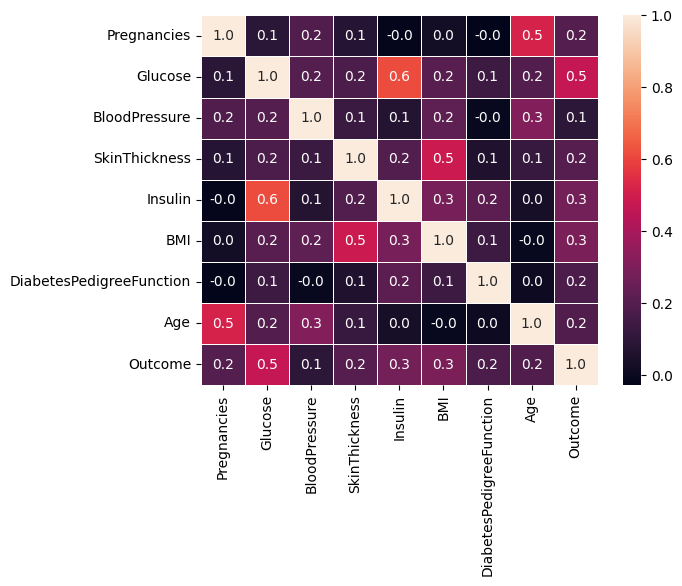

In [7]:
correlation = data.corr()

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

## 🔢 Correlação Real com o Diagnóstico de Diabetes (`Outcome`)

| Variável                    | Correlação com `Outcome` | Interpretação                                  |
|-----------------------------|---------------------------|-------------------------------------------------|
| `Glucose`                  | **0.5**                   | Forte relação com diabetes                      |
| `Insulin`                  | **0.3**                   | Correlação moderada (ausência de muitos registros) |
| `BMI`                      | **0.3**                   | Relação com obesidade                          |
| `Pregnancies`              | **0.2**                   | Gravidez múltipla pode elevar o risco          |
| `Age`                      | **0.2**                   | Risco aumenta com a idade                      |
| `DiabetesPedigreeFunction` | **0.2**                   | Indicador genético relevante                   |
| `SkinThickness`            | **0.2**                   | Ligado à gordura corporal                      |
| `BloodPressure`            | **0.1**                   | Correlação fraca isoladamente                  |

In [8]:
print('\n - Dropando colunas')
data = data.drop(columns=['Insulin', 'BloodPressure'])


 - Dropando colunas


In [9]:
print('\n - Winsorizando os dados')

def winsorize_data(df, columns, lower_quantile=0.05, upper_quantile=0.95):
    for column in columns:
        lower_bound = df[column].quantile(lower_quantile)
        upper_bound = df[column].quantile(upper_quantile)
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


feature_cols = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data = winsorize_data(data, feature_cols)



 - Winsorizando os dados


In [10]:
def max_normalize(df, cols):
    df_norm = df.copy()
    
    # seleciona colunas numéricas, se não especificadas
    if cols is None:
        cols = df_norm.select_dtypes(include="number").columns.tolist()
    
    # calcula máximos e faz a normalização
    max_vals = df_norm[cols].max()

    # evita divisão por zero
    max_vals = max_vals.replace({0: 1})
    
    # divisão vetorizada por coluna
    df_norm[cols] = df_norm[cols].div(max_vals)
    
    return df_norm

data = max_normalize(data, feature_cols)

In [11]:
# Criando X and y par ao algorítmo de aprendizagem de máquina.\
print(' - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset')

X = data[feature_cols]
y = data.Outcome

 - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LocalHost
print(' - Dividindo os dados em Treino e Teste')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f' - Dimensões dos dados -> Treino: {X_train.shape[0]} amostras | Teste: {X_test.shape[0]} amostras')

print(' - Criando e treinando o modelo preditivo')
neigh_local = KNeighborsClassifier(n_neighbors=3)
neigh_local.fit(X_train, y_train)

print(' - Realizando previsões nos dados de teste para avaliação')
y_pred = neigh_local.predict(X_test)

accuracy_local = accuracy_score(y_test, y_pred)

print("\n----------- RESULTADO -----------")
print(f"A acurácia do modelo é: {accuracy_local * 100:.2f}%")
print("---------------------------------")

 - Dividindo os dados em Treino e Teste
 - Dimensões dos dados -> Treino: 429 amostras | Teste: 108 amostras
 - Criando e treinando o modelo preditivo
 - Realizando previsões nos dados de teste para avaliação

----------- RESULTADO -----------
A acurácia do modelo é: 69.44%
---------------------------------


In [16]:
# Servidor 

# Ciando o modelo preditivo para a base trabalhada
print(' - Criando modelo preditivo')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

#realizando previsões com o arquivo de
print(' - Aplicando modelo e enviando para o servidor')
data_app = pd.read_csv('diabetes_app.csv')
data_app = data_app[feature_cols]
y_pred = neigh.predict(data_app)

# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/01_Preprocessing.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "Trio Ternura"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

 - Criando modelo preditivo
 - Aplicando modelo e enviando para o servidor
 - Resposta do servidor:
 {"error":{"code":102,"message":"Espere ao menos 10 minutos entre dois envios, tempo restante 00 dias 00 horas 00 minutos 24 segundos"}} 

